In [15]:
import pandas as pd
data = pd.read_csv('INF2178_A3_data.csv')
data

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2
...,...,...,...,...,...,...,...,...,...
11928,32.51,25.68,11.694,45.63,24.27,20.189,39000.0,39.0,1
11929,31.96,25.73,21.461,47.84,40.35,32.357,26000.0,26.0,1
11930,40.44,30.50,16.836,49.93,41.00,19.803,45000.0,45.0,2
11931,35.51,28.96,28.864,51.60,50.27,35.991,28000.0,28.0,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


<ipython-input-17-51193cf4f7a7>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='incomegroup', y='change_in_reading_score', data=data, ax=ax[0], ci=None)
<ipython-input-17-51193cf4f7a7>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='incomegroup', y='change_in_math_score', data=data, ax=ax[1], ci=None)


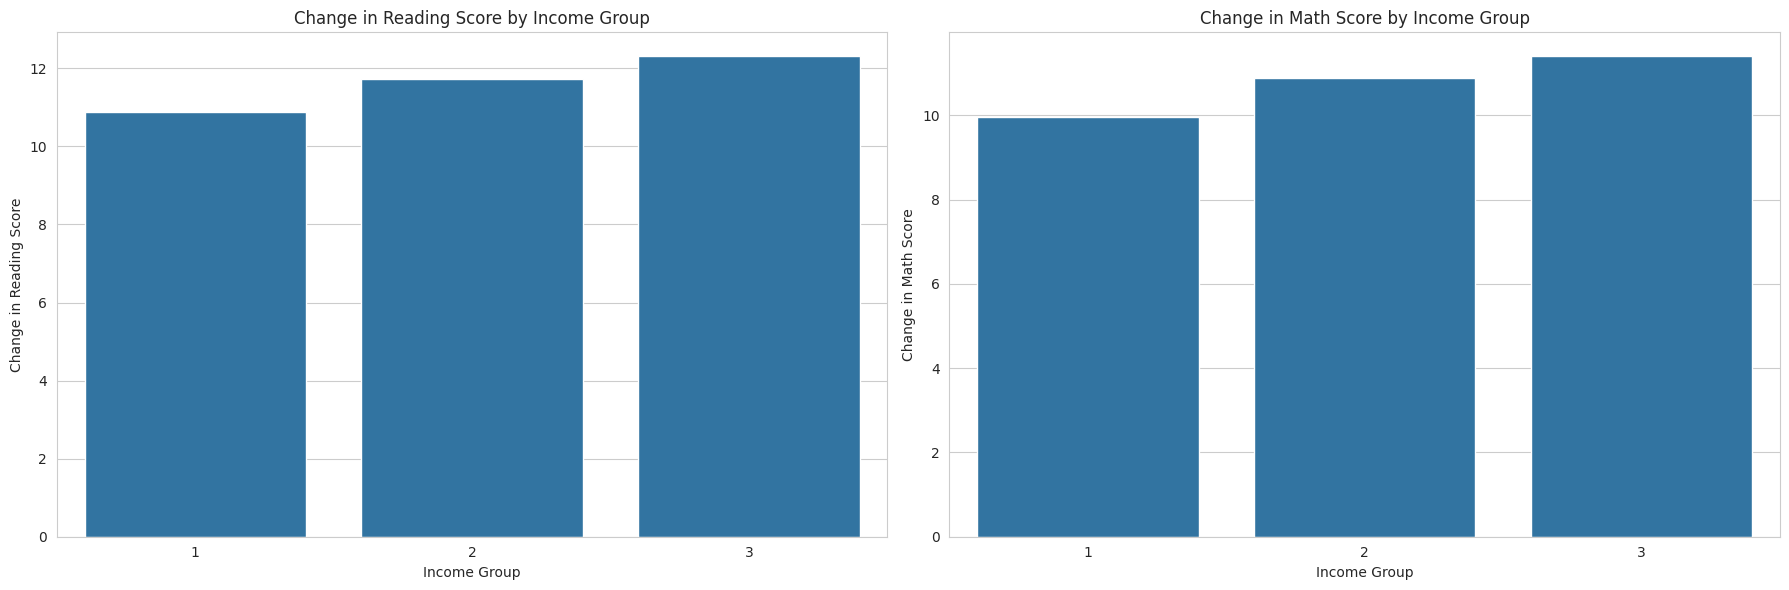

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the change in scores from Fall 1998 to Spring 1999
data['change_in_reading_score'] = data['springreadingscore'] - data['fallreadingscore']
data['change_in_math_score'] = data['springmathscore'] - data['fallmathscore']

# Set the overall aesthetics
sns.set_style("whitegrid")

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Reading Score Changes by Income Group
sns.barplot(x='incomegroup', y='change_in_reading_score', data=data, ax=ax[0], ci=None)
ax[0].set_title('Change in Reading Score by Income Group')
ax[0].set_xlabel('Income Group')
ax[0].set_ylabel('Change in Reading Score')

# Math Score Changes by Income Group
sns.barplot(x='incomegroup', y='change_in_math_score', data=data, ax=ax[1], ci=None)
ax[1].set_title('Change in Math Score by Income Group')
ax[1].set_xlabel('Income Group')
ax[1].set_ylabel('Change in Math Score')

plt.tight_layout()
plt.show()

In [18]:
# Categorize initial general knowledge scores into 3 categories
data['gk_cat'] = pd.qcut(data['fallgeneralknowledgescore'], 3, labels=["Low", "Medium", "High"])

# Calculate average changes in reading and math scores by income group and general knowledge
average_changes_by_group_gk = data.groupby(['incomegroup', 'gk_cat']).agg({
    'change_in_reading_score': 'mean',
    'change_in_math_score': 'mean'
}).reset_index()

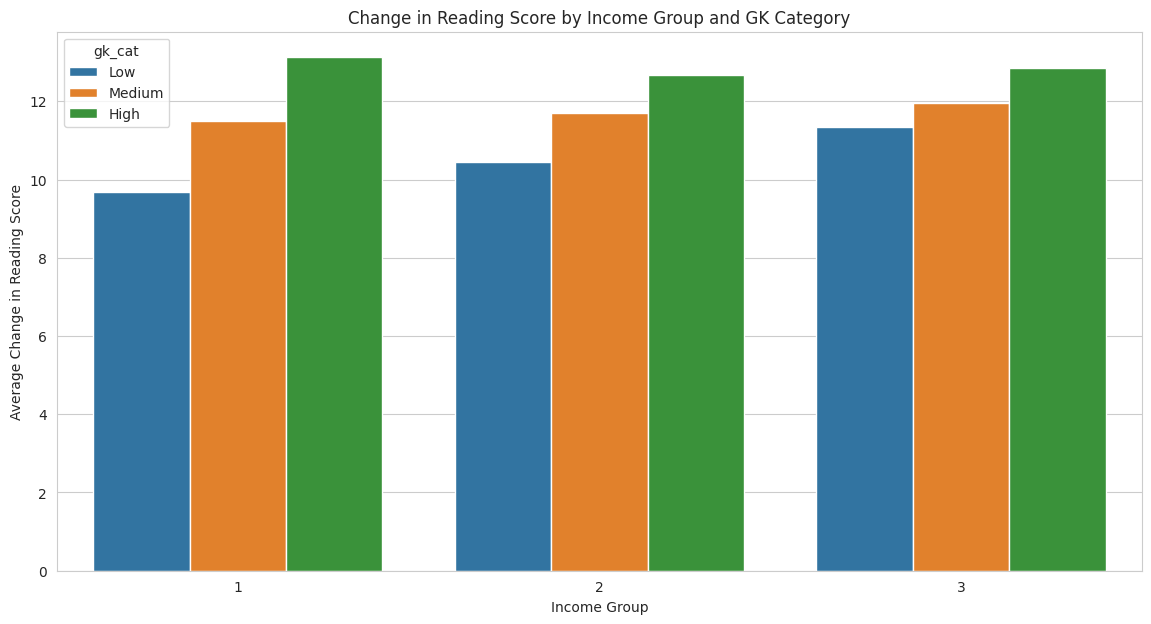

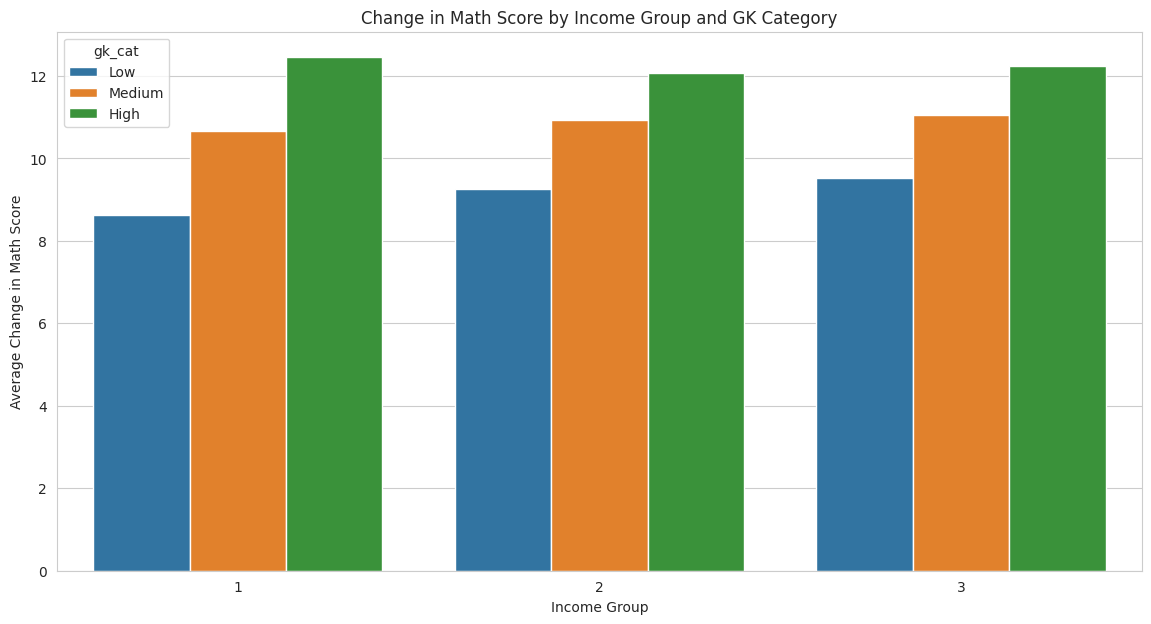

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for Reading Scores
plt.figure(figsize=(14, 7))
sns.barplot(x="incomegroup", y="change_in_reading_score", hue="gk_cat", data=average_changes_by_group_gk)
plt.title('Change in Reading Score by Income Group and GK Category')
plt.xlabel('Income Group')
plt.ylabel('Average Change in Reading Score')
plt.show()

# Plot for Math Scores
plt.figure(figsize=(14, 7))
sns.barplot(x="incomegroup", y="change_in_math_score", hue="gk_cat", data=average_changes_by_group_gk)
plt.title('Change in Math Score by Income Group and GK Category')
plt.xlabel('Income Group')
plt.ylabel('Average Change in Math Score')
plt.show()


# ANOCOVA


In [20]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANCOVA for Reading Scores
model_reading = ols('change_in_reading_score ~ C(incomegroup) + fallgeneralknowledgescore', data=data).fit()
ancova_reading = sm.stats.anova_lm(model_reading, typ=2)

# ANCOVA for Math Scores
model_math = ols('change_in_math_score ~ C(incomegroup) + fallgeneralknowledgescore', data=data).fit()
ancova_math = sm.stats.anova_lm(model_math, typ=2)

model_reading.summary(), ancova_reading, model_math.summary(), ancova_math

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                OLS Regression Results                              
 Dep. Variable:     change_in_reading_score   R-squared:                       0.023
 Model:                                 OLS   Adj. R-squared:                  0.023
 Method:                      Least Squares   F-statistic:                     95.49
 Date:                     Fri, 22 Mar 2024   Prob (F-statistic):           4.52e-61
 Time:                             15:26:23   Log-Likelihood:                -41730.
 No. Observations:                    11933   AIC:                         8.347e+04
 Df Residuals:                        11929   BIC:                         8.350e+04
 Df Model:                                3                                         
 Covariance Type:                 nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
 ----

In [21]:
# ANCOVA for Reading Scores with Interaction Term
model_reading_interaction = ols('change_in_reading_score ~ C(incomegroup) * fallgeneralknowledgescore', data=data).fit()
ancova_reading_interaction = sm.stats.anova_lm(model_reading_interaction, typ=2)

# ANCOVA for Math Scores with Interaction Term
model_math_interaction = ols('change_in_math_score ~ C(incomegroup) * fallgeneralknowledgescore', data=data).fit()
ancova_math_interaction = sm.stats.anova_lm(model_math_interaction, typ=2)

ancova_reading_interaction, ancova_math_interaction

(                                                 sum_sq       df           F  \
 C(incomegroup)                               287.485906      2.0    2.255280   
 fallgeneralknowledgescore                  14054.124684      1.0  220.504660   
 C(incomegroup):fallgeneralknowledgescore    1489.617873      2.0   11.685811   
 Residual                                  760181.418519  11927.0         NaN   
 
                                                 PR(>F)  
 C(incomegroup)                            1.048889e-01  
 fallgeneralknowledgescore                 1.938701e-49  
 C(incomegroup):fallgeneralknowledgescore  8.509085e-06  
 Residual                                           NaN  ,
                                                  sum_sq       df           F  \
 C(incomegroup)                                55.879616      2.0    0.625281   
 fallgeneralknowledgescore                  22425.932956      1.0  501.882773   
 C(incomegroup):fallgeneralknowledgescore     939.110149   